In [233]:
%pylab inline
import pandas as pd
import numpy as np
from datetime import datetime
import os
from customTypes import ThreadType
import thermocouple

Populating the interactive namespace from numpy and matplotlib
/Users/itotatsuhiko/.pyenv/versions/3.8.0/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [234]:
d=os.path.expanduser("~")
d=os.path.join(d,"Desktop", "Data")

In [235]:
temp_dir = os.path.join(d, "Temperature")
pres1_dir = os.path.join(d, "Pressure1")
pres2_dir = os.path.join(d, "Pressure2")

In [236]:
a = os.listdir(temp_dir)
sorted(a)

['out_20191226185147.csv',
 'out_20191226190613.csv',
 'out_20191226194414.csv',
 'out_20191226203247.csv',
 'out_20191226203406.csv',
 'out_20191226203635.csv',
 'out_20191226203904.csv',
 'out_20191226203956.csv',
 'out_20191226204323.csv',
 'out_20191226204409.csv',
 'out_20191226204700.csv',
 'out_20191226205109.csv',
 'out_20191226214146.csv',
 'out_20191226214259.csv',
 'out_20191226215126.csv',
 'out_20191226215404.csv',
 'out_20191226215444.csv',
 'out_20191226215613.csv',
 'out_20191226215717.csv',
 'out_20191227115102.csv',
 'out_20191227115701.csv',
 'out_20191227115914.csv',
 'out_20191227153958.csv',
 'out_20191227154043.csv',
 'out_20191227154335.csv',
 'out_20191227155806.csv',
 'out_20191227161242.csv',
 'out_20191227161918.csv',
 'out_20191227162720.csv',
 'out_20191227162916.csv',
 'out_20191227163243.csv',
 'out_20191227174945.csv',
 'out_20191227202006.csv',
 'out_20191227202034.csv',
 'out_20191227202138.csv']

In [237]:
date = "20191227202138"
start_time = datetime(int(date[:4]), int(date[4:6]), int(date[6:8]), int(date[8:10]), int(date[10:12]), int(date[12:]))
filename = "out_" + date + ".csv"
filename

'out_20191227202138.csv'

In [238]:
""" smoothing savitzky_golay """
# https://plot.ly/python/smoothing/
def savitzky_golay(y, window_size, order):
    ''' smoothing '''
    import numpy as np
    from math import factorial
    from scipy.signal import savgol_filter
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        window_size += 1
    return savgol_filter(y,window_size,order)

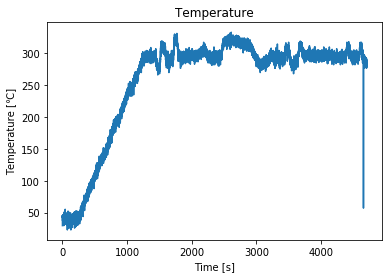

In [239]:
""" temperature """
temp_csv = pd.read_csv(temp_dir + "/" + filename)
plt.title("Temperature")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [℃]")
xy = ThreadType.TEMPERATURE.getCalcArray(np.array(temp_csv))

# mask = np.where(xy[:,1] > 280)
# xy = xy[mask]

plt.plot(xy[:, 0], xy[:, 1])

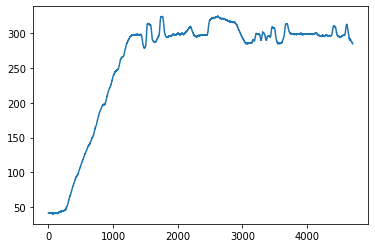

In [240]:
xy[:, 1] = savitzky_golay(xy[:, 1], 100, 1)
temp_xy = xy.copy()
plt.plot(xy[:, 0], xy[:, 1])

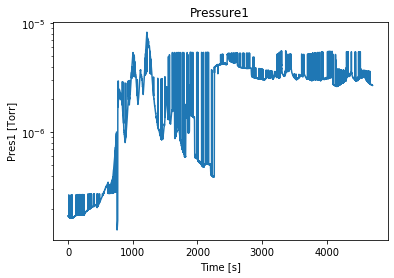

In [241]:
""" pressure1 """
pres1_csv = pd.read_csv(pres1_dir + "/" + filename)
plt.title("Pressure1")
plt.xlabel("Time [s]")
plt.ylabel("Pres1 [Torr]")
xy = ThreadType.PRESSURE1.getCalcArray(np.array(pres1_csv))

xy[:, 1] = [i/(pow(10, 6)) for i in xy[:, 1]]
xy[:4594, 1] = [i/10 for i in xy[:4594, 1]]
plt.plot(xy[:, 0], xy[:, 1])
yscale("log")

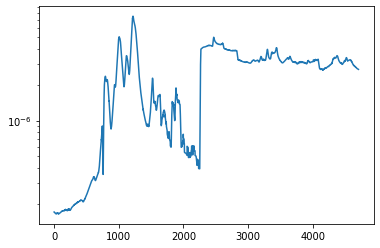

In [242]:
xy[:, 1] = savitzky_golay(xy[:, 1], 100, 1)
pre1_xy = xy.copy()
plt.plot(xy[:, 0], xy[:, 1])
yscale("log")

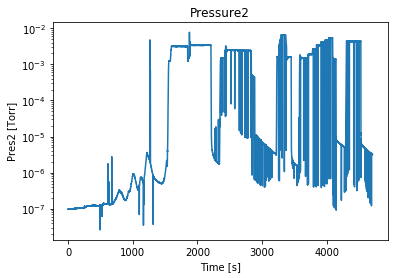

In [243]:
""" pressure2 """
pres2_csv = pd.read_csv(pres2_dir + "/" + filename)
plt.title("Pressure2")
plt.xlabel("Time [s]")
plt.ylabel("Pres2 [Torr]")
xy = ThreadType.PRESSURE2.getCalcArray(np.array(pres2_csv))

plt.plot(xy[:, 0], xy[:, 1])
yscale("log")

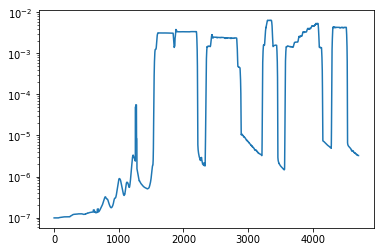

In [244]:
xy[:, 1] = savitzky_golay(xy[:, 1], 100, 1)
pre2_xy = xy.copy()
plt.plot(xy[:, 0], xy[:, 1])
yscale("log")

In [245]:
""" Argon and D2 plasma """

# time 
gas_in_time = (datetime(2019,12,27,20,47,15) - start_time).total_seconds() # Argon and D2
cathode_on_time = (datetime(2019,12,27,20,48,36) - start_time).total_seconds() # 24.3 A filament
vgclose_time = (datetime(2019, 12, 27, 20, 49, 4) - start_time).total_seconds() # vgclose
plasma_on_time = (datetime(2019, 12, 27, 20, 49, 27) - start_time).total_seconds()
plasma_off_time = (datetime(2019, 12, 27, 20, 51, 34) - start_time).total_seconds()

print("""
    gas : {},
    cathode on: {},
    vgclose: {},
    plasma on: {},
    plasma off: {}
""".format(gas_in_time, cathode_on_time, vgclose_time, plasma_on_time, plasma_off_time))



    gas : 1537.0,
    cathode on: 1618.0,
    vgclose: 1646.0,
    plasma on: 1669.0,
    plasma off: 1796.0



In [246]:
# mask
mask = np.where((temp_xy[:,0] > 1530)&(temp_xy[:,0]<1800))
temp_xy1 = temp_xy[mask]

mask = np.where((pre1_xy[:,0] > 1530)&(pre1_xy[:,0]<1800))
pre1_xy1 = pre1_xy[mask]

mask = np.where((pre2_xy[:,0] > 1530)&(pre2_xy[:,0]<1800))
pre2_xy1 = pre2_xy[mask]

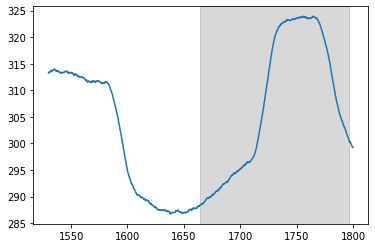

In [247]:
# temperature
plt.plot(temp_xy1[:, 0], temp_xy1[:, 1])
plt.axvspan(plasma_on_time-5, plasma_off_time, color="gray", alpha=0.3)

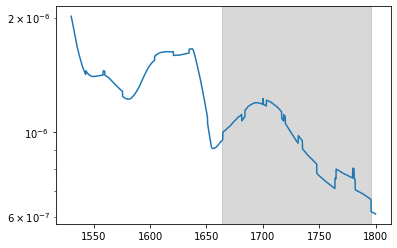

In [248]:
# ionization gauge pressure
plt.plot(pre1_xy1[:, 0], pre1_xy1[:, 1])
plt.axvspan(plasma_on_time-5, plasma_off_time, color="gray", alpha=0.3)
yscale('log')

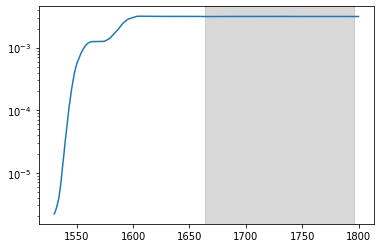

In [249]:
# pfeiffer gauge pressure
plt.plot(pre2_xy1[:, 0], pre2_xy1[:, 1])
plt.axvspan(plasma_on_time-5, plasma_off_time, color="gray", alpha=0.3)
yscale('log')

In [250]:
""" Argon and D2 plasma 1A → 2A """

# time 
gas_in_time = (datetime(2019,12,27,20,52,59) - start_time).total_seconds() # Argon and D2
vgclose_time = (datetime(2019, 12, 27, 20, 54, 24) - start_time).total_seconds() # vgclose
plasma_on1_time = (datetime(2019, 12, 27, 20, 54, 29) - start_time).total_seconds() # 1A
plasma_on2_time = (datetime(2019, 12, 27, 20, 56, 44) - start_time).total_seconds() # 2A
plasma_off_time = (datetime(2019, 12, 27, 20, 58, 20) - start_time).total_seconds()
cathode_off_time = (datetime(2019,12,27,20,58,34) - start_time).total_seconds() # 24.3 A filament 

print("""
    gas : {},
    vgclose: {},
    plasma on1: {},
    plasma on2: {},
    plasma off: {},
    cathode off: {}
""".format(gas_in_time, vgclose_time, plasma_on1_time, plasma_on2_time, plasma_off_time, cathode_off_time, ))



    gas : 1881.0,
    vgclose: 1966.0,
    plasma on1: 1971.0,
    plasma on2: 2106.0,
    plasma off: 2202.0,
    cathode off: 2216.0



In [251]:
# mask
mask = np.where((temp_xy[:,0] > 1850)&(temp_xy[:,0]<2230))
temp_xy1 = temp_xy[mask]

mask = np.where((pre1_xy[:,0] > 1850)&(pre1_xy[:,0]<2230))
pre1_xy1 = pre1_xy[mask]

mask = np.where((pre2_xy[:,0] > 1850)&(pre2_xy[:,0]<2230))
pre2_xy1 = pre2_xy[mask]

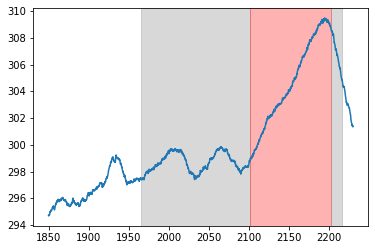

In [252]:
# temperature
plt.plot(temp_xy1[:, 0], temp_xy1[:, 1])
plt.axvspan(plasma_on1_time-5, plasma_on2_time-5, color="gray", alpha=0.3)
plt.axvspan(plasma_on2_time-5, plasma_off_time, color="red", alpha=0.3)
plt.axvspan(plasma_off_time, cathode_off_time, color="gray", alpha=0.3)

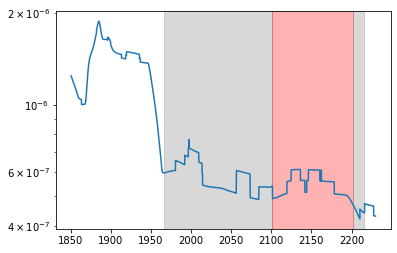

In [253]:
# ionization gauge pressure
plt.plot(pre1_xy1[:, 0], pre1_xy1[:, 1])
plt.axvspan(plasma_on1_time-5, plasma_on2_time-5, color="gray", alpha=0.3)
plt.axvspan(plasma_on2_time-5, plasma_off_time, color="red", alpha=0.3)
plt.axvspan(plasma_off_time, cathode_off_time, color="gray", alpha=0.3)
yscale('log')

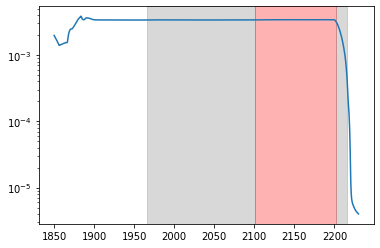

In [254]:
# pfeiffer gauge pressure
plt.plot(pre2_xy1[:, 0], pre2_xy1[:, 1])
yscale('log')
plt.axvspan(plasma_on1_time-5, plasma_on2_time-5, color="gray", alpha=0.3)
plt.axvspan(plasma_on2_time-5, plasma_off_time, color="red", alpha=0.3)
plt.axvspan(plasma_off_time, cathode_off_time, color="gray", alpha=0.3)

In [255]:
""" Argon and D2 plasma 2A → 1A """

# time 
gas_in_d_time = (datetime(2019,12,27,21, 0, 35) - start_time).total_seconds() # D2
gas_in_a_time = (datetime(2019,12,27,21, 1, 54) - start_time).total_seconds() # Argon
plasma_on2_time = (datetime(2019, 12, 27, 21, 2, 40) - start_time).total_seconds() # 2A
plasma_on1_time = (datetime(2019, 12, 27, 21, 5, 16) - start_time).total_seconds() # 1A

gas_out_d_time = (datetime(2019,12,27,21, 8, 52) - start_time).total_seconds() # D2
gas_out_a_time = (datetime(2019,12,27,21, 9, 47) - start_time).total_seconds() # Argon

plasma_off_time = (datetime(2019, 12, 27, 21, 9, 51) - start_time).total_seconds()
cathode_off_time = (datetime(2019,12,27,21, 10, 9) - start_time).total_seconds() # 24.3 A filament 

print("""
    D2 in : {},
    Argon in : {},
    plasma on2: {},
    plasma on1: {},
    D2 out: {},
    Argon out: {},
    plasma off: {},
    cathode off: {}
""".format(gas_in_d_time, gas_in_a_time, plasma_on2_time, plasma_on1_time, gas_out_d_time, gas_out_a_time, plasma_off_time, cathode_off_time))



    D2 in : 2337.0,
    Argon in : 2416.0,
    plasma on2: 2462.0,
    plasma on1: 2618.0,
    D2 out: 2834.0,
    Argon out: 2889.0,
    plasma off: 2893.0,
    cathode off: 2911.0



In [256]:
# mask
mask = np.where((temp_xy[:,0] > 2300)&(temp_xy[:,0]<2920))
temp_xy1 = temp_xy[mask]

mask = np.where((pre1_xy[:,0] > 2300)&(pre1_xy[:,0]<2920))
pre1_xy1 = pre1_xy[mask]

mask = np.where((pre2_xy[:,0] > 2300)&(pre2_xy[:,0]<2920))
pre2_xy1 = pre2_xy[mask] 

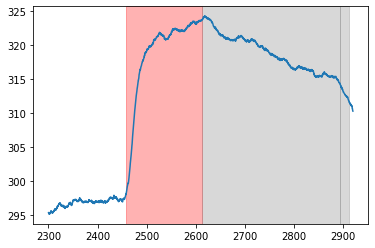

In [257]:
# temperature
plt.plot(temp_xy1[:, 0], temp_xy1[:, 1])
plt.axvspan(plasma_on2_time-5, plasma_on1_time-5, color="red", alpha=0.3)
plt.axvspan(plasma_on1_time-5, plasma_off_time, color="gray", alpha=0.3)
plt.axvspan(plasma_off_time, cathode_off_time, color="gray", alpha=0.3)

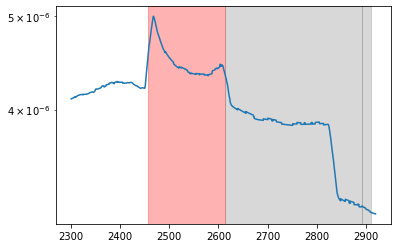

In [258]:
# ionization gauge pressure
plt.plot(pre1_xy1[:, 0], pre1_xy1[:, 1])
plt.axvspan(plasma_on2_time-5, plasma_on1_time-5, color="red", alpha=0.3)
plt.axvspan(plasma_on1_time-5, plasma_off_time, color="gray", alpha=0.3)
plt.axvspan(plasma_off_time, cathode_off_time, color="gray", alpha=0.3)
yscale('log')

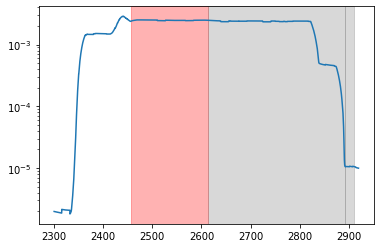

In [259]:
# pfeiffer gauge pressure
plt.plot(pre2_xy1[:, 0], pre2_xy1[:, 1])
yscale('log')
plt.axvspan(plasma_on2_time-5, plasma_on1_time-5, color="red", alpha=0.3)
plt.axvspan(plasma_on1_time-5, plasma_off_time, color="gray", alpha=0.3)
plt.axvspan(plasma_off_time, cathode_off_time, color="gray", alpha=0.3)

In [260]:
""" no plasma, any permeation """

# time
gas_in_time = (datetime(2019, 12, 27, 21, 15, 14) - start_time).total_seconds() # D2
gas_out_time = (datetime(2019, 12, 27, 21, 21, 1) - start_time).total_seconds() # D2

print("""
    D2 in: {},
    D2 out: {}
""".format(gas_in_time, gas_out_time))


    D2 in: 3216.0,
    D2 out: 3563.0



In [261]:
# mask
mask = np.where((temp_xy[:,0] > 2930)&(temp_xy[:,0]<3570))
temp_xy1 = temp_xy[mask]

mask = np.where((pre1_xy[:,0] > 2930)&(pre1_xy[:,0]<3570))
pre1_xy1 = pre1_xy[mask]

mask = np.where((pre2_xy[:,0] > 2930)&(pre2_xy[:,0]<3570))
pre2_xy1 = pre2_xy[mask] 

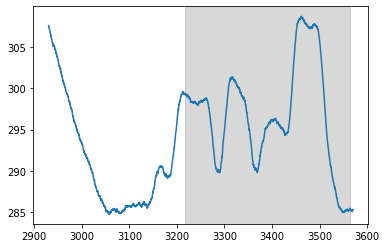

In [262]:
# temperature
plt.plot(temp_xy1[:, 0], temp_xy1[:, 1])
plt.axvspan(gas_in_time, gas_out_time, color="gray", alpha=0.3)

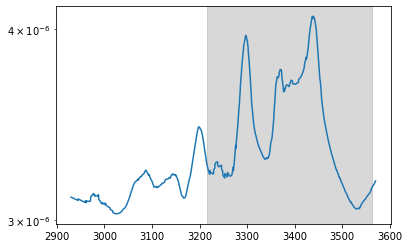

In [263]:
# ionization gauge pressure
plt.plot(pre1_xy1[:, 0], pre1_xy1[:, 1])
plt.axvspan(gas_in_time, gas_out_time, color="gray", alpha=0.3)
yscale('log') 

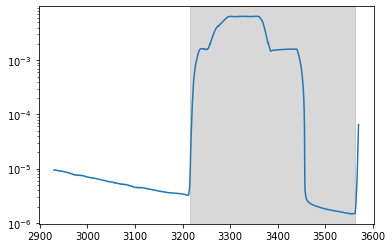

In [264]:
# pfeiffer gauge pressure
plt.plot(pre2_xy1[:, 0], pre2_xy1[:, 1])
plt.axvspan(gas_in_time, gas_out_time, color="gray", alpha=0.3)
yscale('log')

In [265]:
""" Argon plasma and add D2 """

# time
gas_in_a_time = (datetime(2019, 12, 27, 21, 21, 14) - start_time).total_seconds() # Argon
cathode_on_time = (datetime(2019, 12, 27, 21, 21, 37) - start_time).total_seconds()
plasma_on_time = (datetime(2019, 12, 27, 21, 21, 42) - start_time).total_seconds()

gas_in_d_time = (datetime(2019, 12, 27, 21, 23, 12) - start_time).total_seconds()
gas_out_d_time = (datetime(2019, 12, 27, 21, 29, 49) - start_time).total_seconds()
gas_out_a_time = (datetime(2019, 12, 27, 21, 30, 45) - start_time).total_seconds()

cathode_off_time = (datetime(2019, 12, 27, 21, 31, 19) - start_time).total_seconds()
plasma_off_time = (datetime(2019, 12, 27, 21, 31, 24) - start_time).total_seconds()

print("""
    Argon in: {},
    cathode on: {},
    plasma on: {},
    D2 in: {},
    D2 out: {},
    Argon out: {},
    cathode off: {},
    plasma off: {},
""".format(gas_in_a_time, cathode_on_time, plasma_on_time, gas_in_d_time, gas_out_d_time, gas_out_a_time, cathode_off_time, plasma_off_time)) 


    Argon in: 3576.0,
    cathode on: 3599.0,
    plasma on: 3604.0,
    D2 in: 3694.0,
    D2 out: 4091.0,
    Argon out: 4147.0,
    cathode off: 4181.0,
    plasma off: 4186.0,



In [266]:
# mask
mask = np.where((temp_xy[:,0] > 3570)&(temp_xy[:,0]<4190))
temp_xy1 = temp_xy[mask]

mask = np.where((pre1_xy[:,0] > 3570)&(pre1_xy[:,0]<4190))
pre1_xy1 = pre1_xy[mask]

mask = np.where((pre2_xy[:,0] > 3570)&(pre2_xy[:,0]<4190))
pre2_xy1 = pre2_xy[mask] 

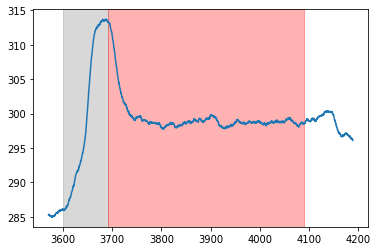

In [267]:
# temperature
plt.plot(temp_xy1[:, 0], temp_xy1[:, 1])
plt.axvspan(plasma_on_time-5, gas_in_d_time-3, color="gray", alpha=0.3)
plt.axvspan(gas_in_d_time-3, gas_out_d_time, color="red", alpha=0.3)

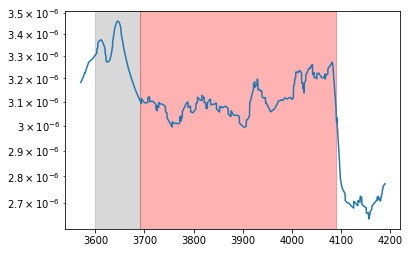

In [268]:
# ionization gauge pressure
plt.plot(pre1_xy1[:, 0], pre1_xy1[:, 1])
plt.axvspan(plasma_on_time-5, gas_in_d_time-3, color="gray", alpha=0.3)
plt.axvspan(gas_in_d_time-3, gas_out_d_time, color="red", alpha=0.3)
yscale('log') 

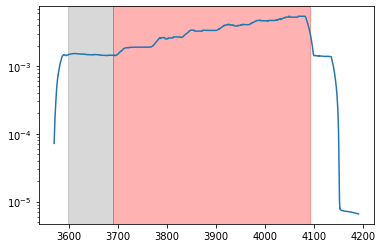

In [269]:
# pfeiffer gauge pressure
plt.plot(pre2_xy1[:, 0], pre2_xy1[:, 1])
plt.axvspan(plasma_on_time-5, gas_in_d_time-3, color="gray", alpha=0.3)
plt.axvspan(gas_in_d_time-3, gas_out_d_time, color="red", alpha=0.3)
yscale('log')

In [270]:
""" no plasma, any permeation ? on HOT filament """

# time
gas_in_time = (datetime(2019, 12, 27, 21, 33, 7) - start_time).total_seconds() # D2
cathode_on_time = (datetime(2019, 12, 27, 21, 34, 23) - start_time).total_seconds()
cathode_off_time = (datetime(2019, 12, 27, 21, 36, 32) - start_time).total_seconds()
gas_out_time = (datetime(2019, 12, 27, 21, 37, 7) - start_time).total_seconds()


print("""
    gas in : {},
    cathode on: {},
    cathode off: {},
    gas out: {}
""".format(gas_in_time, cathode_on_time, cathode_off_time, gas_out_time)) 


    gas in : 4289.0,
    cathode on: 4365.0,
    cathode off: 4494.0,
    gas out: 4529.0



In [271]:
# mask
mask = np.where((temp_xy[:,0] > 4280)&(temp_xy[:,0]<4550))
temp_xy1 = temp_xy[mask]

mask = np.where((pre1_xy[:,0] > 4280)&(pre1_xy[:,0]<4550))
pre1_xy1 = pre1_xy[mask]

mask = np.where((pre2_xy[:,0] > 4280)&(pre2_xy[:,0]<4550))
pre2_xy1 = pre2_xy[mask] 

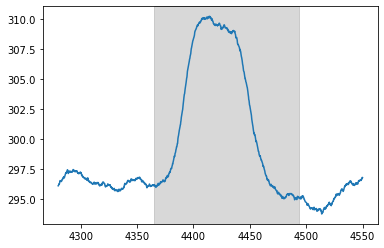

In [272]:
# temperature
plt.plot(temp_xy1[:, 0], temp_xy1[:, 1])
plt.axvspan(cathode_on_time, cathode_off_time, color="gray", alpha=0.3)

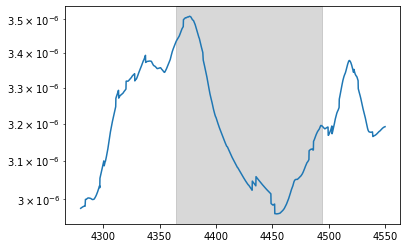

In [273]:
# ionization gauge pressure
plt.plot(pre1_xy1[:, 0], pre1_xy1[:, 1])
plt.axvspan(cathode_on_time, cathode_off_time, color="gray", alpha=0.3)
yscale('log')

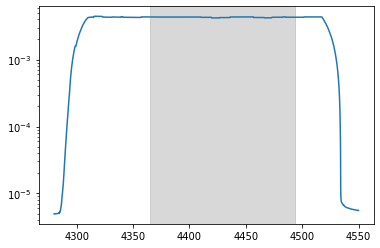

In [274]:
# pfeiffer gauge pressure
plt.plot(pre2_xy1[:, 0], pre2_xy1[:, 1])
plt.axvspan(cathode_on_time, cathode_off_time, color="gray", alpha=0.3)
yscale('log')